In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Declaracion de variables

# Data actual clasificada por categoria
df_actual = pd.read_csv('InformationByTokenClass.csv')

# Directorio de los datasets
DATA_PATH = ''

# Años a extraer
years = ['2019', '2020', '2021', '2022', '2023','2024']

# Lista de lista de los datasets cargados por año
df_per_year = [] # 0: 2019 - 1: 2020 - 2: 2021 - 3: 2022 - 4: 2023

In [3]:
# Funcion para leer todos los datasets en un año, y poner esa lista en la lista de los datasets por año
def load_data(year):
  folder_path = DATA_PATH + year + '/'
  print("Cargando data desde " + folder_path)
  csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
  dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
  df_per_year.append(dfs)

In [4]:
# Aplicamos la funcion a cada año que queremos extraer
for year in years:
  load_data(year)

Cargando data desde 2019/
Cargando data desde 2020/
Cargando data desde 2021/
Cargando data desde 2022/
Cargando data desde 2023/
Cargando data desde 2024/


In [5]:
# Eliminamos las listas internas para que nos queden solo los datsets en una sola lista
df_per_year = [dataset for sublist in df_per_year for dataset in sublist]

In [6]:
print(len(df_per_year))

305


#Class / categoria 0

In [7]:
# Extraemos los tokens del dataset actual que tengan como clase 0
df_0 = df_actual[df_actual['Class'] == 0].copy()

In [8]:
# Funcion para obtener cuantas veces los tokens actuales de una categoria se repiten en la lista de datasets historicos
def count_names_in_datasets(df, datasets_list):
  # Obtener nombres únicos del DataFrame filtrado (clase 0)
  unique_names = df['Name'].unique()

  # Diccionario para almacenar el conteo por cada nombre
  name_counts = {}

  # Iterar sobre cada nombre único
  for name in unique_names:
      count = 0
      # Verificar en cuántos datasets está presente el nombre
      for dataset in datasets_list:
          if name in dataset['name'].values:
              count += 1
      # Almacenar el conteo en el diccionario
      ratio = (count / len(datasets_list)) * 100
      if ratio >= 80:
        name_counts[name] = ratio

  # Retornar el diccionario con los conteos
  return name_counts

In [9]:
name_counts_0 = count_names_in_datasets(df_0, df_per_year)

In [10]:
# Iterar e imprimir llave y valor
for key, value in name_counts_0.items():
  print(f"Nombre: {key}, % Ocurrencias: {value}%")

Nombre: Golem, % Ocurrencias: 100.0%
Nombre: OriginTrail, % Ocurrencias: 100.0%
Nombre: Arcblock, % Ocurrencias: 99.672131147541%
Nombre: iExec RLC, % Ocurrencias: 100.0%
Nombre: Numeraire, % Ocurrencias: 100.0%
Nombre: Cortex, % Ocurrencias: 99.672131147541%
Nombre: Verasity, % Ocurrencias: 95.73770491803279%
Nombre: Measurable Data Token, % Ocurrencias: 99.672131147541%
Nombre: Sentinel Protocol, % Ocurrencias: 99.672131147541%
Nombre: Vectorspace AI, % Ocurrencias: 83.93442622950819%
Nombre: DeepBrain Chain, % Ocurrencias: 99.672131147541%
Nombre: Matrix AI Network, % Ocurrencias: 99.672131147541%
Nombre: Phantasma, % Ocurrencias: 99.672131147541%
Nombre: PIBBLE, % Ocurrencias: 97.04918032786885%
Nombre: Presearch, % Ocurrencias: 99.672131147541%
Nombre: Lambda, % Ocurrencias: 99.672131147541%
Nombre: ROOBEE, % Ocurrencias: 86.22950819672131%
Nombre: Dock, % Ocurrencias: 99.672131147541%
Nombre: DxChain Token, % Ocurrencias: 99.672131147541%
Nombre: TrustVerse, % Ocurrencias: 90.491

In [11]:
# Funcion para crear un dataset con los tokens presentes en el diccionario iterando en la lista de datasets
def filter_and_combine_datasets(names, datasets):
  # Crear una lista vacía para almacenar los DataFrames filtrados
  filtered_dfs = []

  # Iterar sobre la lista de datasets
  for dataset in datasets:
      # Filtrar filas donde el nombre está en las llaves del diccionario
      filtered_df = dataset[dataset['name'].isin(names.keys())]
      # Agregar el DataFrame filtrado a la lista
      filtered_dfs.append(filtered_df)

  # Combinar todos los DataFrames filtrados en uno solo
  combined_df = pd.concat(filtered_dfs, ignore_index=True)

  # Ordenar el DataFrame combinado por la columna 'date'
  combined_df = combined_df.sort_values(by='last_updated').reset_index(drop=True)

  # Eliminar la columna 'maxSupply'
  combined_df = combined_df.drop(columns=['maxSupply'], errors='ignore')

  return combined_df

In [12]:
df_0_final = filter_and_combine_datasets(name_counts_0, df_per_year)

In [13]:
# Convertir todos los 0 en el DataFrame a NaN
df_0_final = df_0_final.replace(0, np.nan)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_intervals(df):
    df['last_updated'] = pd.to_datetime(df['last_updated'])

    # Extraer fechas únicas y ordenarlas cronológicamente
    unique_dates = sorted(df['last_updated'].unique())

    # Calcular los intervalos entre fechas consecutivas
    intervals = [(unique_dates[i] - unique_dates[i - 1]).days for i in range(1, len(unique_dates))]

    # Crear un DataFrame para visualizar los intervalos
    intervals_df = pd.DataFrame({
        'Date': unique_dates[1:],  # Fecha actual
        'Interval_Days': intervals  # Intervalo en días
    })

    # Graficar los intervalos
    plt.figure(figsize=(12, 6))
    plt.plot(intervals_df['Date'], intervals_df['Interval_Days'], marker='o', linestyle='-', color='b', label='Intervalos')

    # Añadir más divisiones en el eje y
    plt.yticks(range(min(intervals), max(intervals) + 1, 1))  # Incremento de 1 en el eje y para más divisiones

    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Intervalo en días', fontsize=12)
    plt.title('Intervalos entre fechas únicas en el dataset', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Crear una lista de fechas con incremento de 7 días desde la primera fecha
    start_date = unique_dates[0]
    end_date = unique_dates[-1]
    generated_dates = pd.date_range(start=start_date, end=end_date, freq='7D')

    # Detectar las fechas que están en el rango generado pero no en el dataset original
    missing_dates = generated_dates.difference(unique_dates)

    # Imprimir fechas fuera del intervalo
    print("Fechas faltantes (no presentes en el dataset):")
    for date in missing_dates:
        print(date.strftime('%Y-%m-%d'))


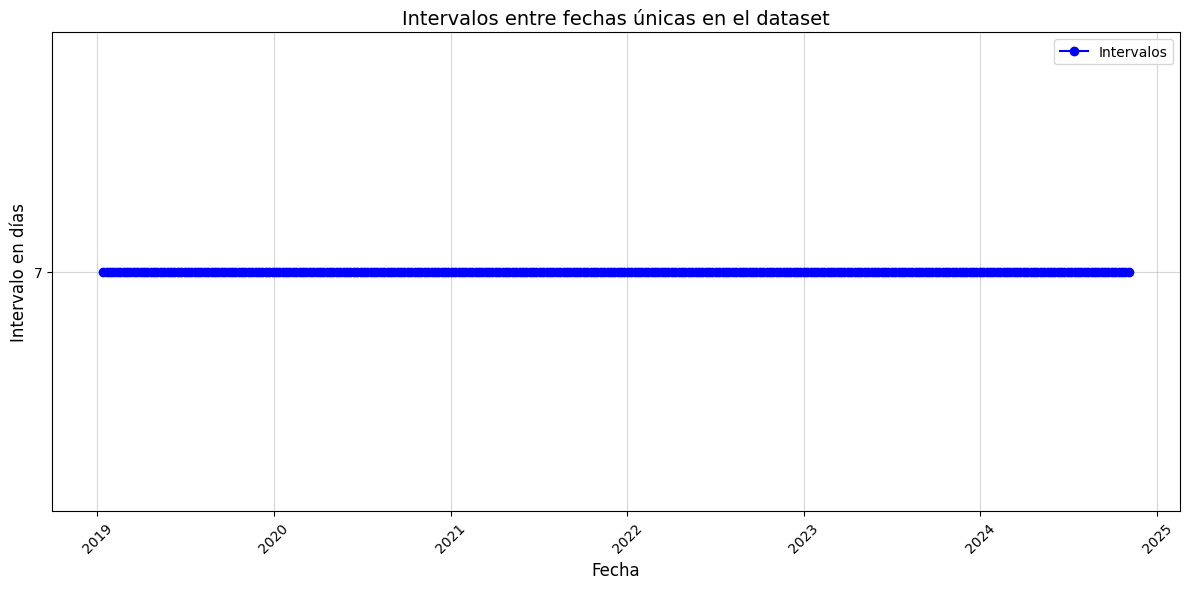

Fechas faltantes (no presentes en el dataset):


In [15]:
plot_intervals(df_0_final)

In [18]:
df_0_final = df_0_final.sort_values(by=['name', 'last_updated'])
df_0_final

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
2,AICHAIN,AIT,852,5.350671e+08,2.100000e+09,2018-01-16,2019-01-06,0.001181,9.284027e+03,6.319428e+05,-0.285163,3.663400,0.825544
33,AICHAIN,AIT,841,5.350671e+08,2.100000e+09,2018-01-16,2019-01-13,0.000996,1.596940e+04,5.331185e+05,0.003070,-9.624840,-16.551700
57,AICHAIN,AIT,860,5.350671e+08,2.100000e+09,2018-01-16,2019-01-20,0.000871,9.331242e+03,4.661855e+05,-0.207253,-10.948600,-12.289000
81,AICHAIN,AIT,905,5.350671e+08,2.100000e+09,2018-01-16,2019-01-27,0.000687,3.088536e+04,3.673997e+05,-0.379060,15.855900,-21.686600
108,AICHAIN,AIT,884,5.350671e+08,2.100000e+09,2018-01-16,2019-02-03,0.000688,1.796147e+04,3.680670e+05,0.026819,-13.114200,3.582750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9070,iExec RLC,RLC,335,7.238255e+07,8.699978e+07,2017-04-20,2024-10-06,1.517471,2.238283e+06,1.098384e+08,0.711110,2.598514,-14.143807
9104,iExec RLC,RLC,349,7.238255e+07,8.699978e+07,2017-04-20,2024-10-13,1.459241,2.328285e+06,1.056236e+08,0.374736,-1.613016,-3.837277
9137,iExec RLC,RLC,374,7.238255e+07,8.699978e+07,2017-04-20,2024-10-20,1.678774,2.669904e+07,1.215139e+08,-0.032898,7.782865,15.044302
9171,iExec RLC,RLC,377,7.238255e+07,8.699978e+07,2017-04-20,2024-10-27,1.550135,1.053117e+07,1.122028e+08,0.884719,6.546783,-7.662628


In [19]:
# Funcion para calcular cuantos valores nulos hay en cada columna agrupado por nombre de token
def count_nulls(df):

  # Contar los NaN por columna dentro de cada grupo de 'name'
  nan_counts_by_group = df.groupby('name').apply(lambda x: x.isna().sum())

  return nan_counts_by_group

In [22]:
nulls = count_nulls(df_0_final)
nulls

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
name,,,,,,,,,,,,,
Aion,0,0,0,50,0,0,0,0,1,50,0,0,0
Arcblock,0,0,0,0,0,0,0,0,0,0,0,0,0
Cortex,0,0,0,0,0,0,0,0,0,0,0,0,0
DeepBrain Chain,0,0,0,0,0,0,0,0,0,0,0,0,0
Dock,0,0,0,0,0,0,0,0,0,0,0,0,0
DxChain Token,0,0,0,0,0,0,0,0,0,0,0,0,0
GNY,0,0,0,9,0,0,0,0,0,9,0,0,1
GoCrypto Token,0,0,0,0,0,0,0,0,1,0,0,0,1
Golem,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Eliminamos los tokens que tengan demasiados valores con NA en varias columnas

names_to_remove = ['AICHAIN', 'Cloudbric', 'EncrypGen', 'Neurotoken', 'OceanEx Token', 'PIBBLE', 'ThoreCoin']
df_0_final = df_0_final[~df_0_final['name'].isin(names_to_remove)]

In [23]:
names_to_remove = ['Vectorspace AI', 'Santiment Network Token', 'Kambria', 'Aion']
df_0_final = df_0_final[~df_0_final['name'].isin(names_to_remove)]

In [24]:
# funcion para rellenar nulos
def fill_nulls(df):
    import pandas as pd

    # Asegurarse de que las columnas de fecha estén en formato datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    df['dateAdded'] = pd.to_datetime(df['dateAdded'])

    # Agrupar por 'name' para iterar sobre cada token
    filled_data = []

    for name, group in df.groupby('name'):
        # Verificar tipos de datos y convertir a float si es necesario
        numeric_cols = ['circulatingSupply', 'volume24h', 'marketCap',
                        'percentChange1h', 'percentChange24h', 'percentChange7d']
        group[numeric_cols] = group[numeric_cols].apply(pd.to_numeric, errors='coerce')

        # Interpolación para las columnas especificadas
        for col in numeric_cols:
            group[col] = group[col].interpolate(method='linear', limit_direction='both')

        # Llenar los extremos si quedan nulos después de la interpolación
        group[numeric_cols] = group[numeric_cols].fillna(method='ffill').fillna(method='bfill')

        # Añadir el grupo procesado a la lista de resultados
        filled_data.append(group)

    # Combinar todos los grupos en un DataFrame final
    filled_df = pd.concat(filled_data, ignore_index=True)
    return filled_df

In [25]:
df_0_final = fill_nulls(df_0_final)

In [26]:
nulls = count_nulls(df_0_final)
nulls

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
name,,,,,,,,,,,,,
Arcblock,0,0,0,0,0,0,0,0,0,0,0,0,0
Cortex,0,0,0,0,0,0,0,0,0,0,0,0,0
DeepBrain Chain,0,0,0,0,0,0,0,0,0,0,0,0,0
Dock,0,0,0,0,0,0,0,0,0,0,0,0,0
DxChain Token,0,0,0,0,0,0,0,0,0,0,0,0,0
GNY,0,0,0,0,0,0,0,0,0,0,0,0,0
GoCrypto Token,0,0,0,0,0,0,0,0,0,0,0,0,0
Golem,0,0,0,0,0,0,0,0,0,0,0,0,0
LBRY Credits,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Funcion para ver el ratio de presencia del token en todas las fechas
def calculate_presence_ratio(df):
    # Asegurarse de que la columna 'last_updated' esté en formato datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])

    # Obtener el número total de fechas únicas
    total_unique_dates = df['last_updated'].nunique()

    # Calcular el número de fechas únicas por cada 'name'
    name_date_counts = df.groupby('name')['last_updated'].nunique()

    # Calcular el ratio de presencia para cada 'name'
    presence_ratio = (name_date_counts / total_unique_dates) * 100

    # Convertir el resultado a un DataFrame
    presence_ratio_df = presence_ratio.reset_index()
    presence_ratio_df.columns = ['name', 'presence_ratio']

    return presence_ratio_df

In [28]:
presence_ratio = calculate_presence_ratio(df_0_final)
presence_ratio

,name,presence_ratio
0,Arcblock,99.640288
1,Cortex,99.640288
2,DeepBrain Chain,99.640288
3,Dock,99.640288
4,DxChain Token,99.640288
5,GNY,92.805755
6,GoCrypto Token,99.280576
7,Golem,100.000000
8,LBRY Credits,99.640288
9,Lambda,99.640288


In [29]:
def fill_missing_dates(df):
    # Asegurarse de que las columnas de fecha estén en formato datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    df['dateAdded'] = pd.to_datetime(df['dateAdded'])

    # Obtener las fechas únicas
    unique_dates = sorted(df['last_updated'].unique())

    # Lista para almacenar las filas procesadas
    filled_data = []

    # Agrupar por 'name' para iterar sobre cada token
    for name, group in df.groupby('name'):
        # Crear un índice con todas las fechas únicas
        full_dates = pd.DataFrame({'last_updated': unique_dates})

        # Asegurarnos de que el grupo esté ordenado por 'last_updated'
        group = group.sort_values('last_updated')

        # Unir el grupo con las fechas completas
        merged = pd.merge(full_dates, group, on='last_updated', how='left')

        # Rellenar las columnas constantes (name, symbol, dateAdded)
        merged['name'] = merged['name'].fillna(method='ffill').fillna(method='bfill')
        merged['symbol'] = merged['symbol'].fillna(method='ffill').fillna(method='bfill')
        merged['dateAdded'] = merged['dateAdded'].fillna(method='ffill').fillna(method='bfill')

        # Rellenar las columnas con interpolación (cmcRank, price, volume24h, marketCap, percentChange1h, percentChange24h, percentChange7d)
        for col in ['cmcRank', 'price', 'volume24h', 'marketCap', 'percentChange1h', 'percentChange24h', 'percentChange7d']:
            merged[col] = merged[col].interpolate(method='linear', limit_direction='both')

        # Rellenar circulatorySupply y totalSupply con el valor anterior o de abajo
        for col in ['circulatingSupply', 'totalSupply']:
            merged[col] = merged[col].fillna(method='ffill').fillna(method='bfill')

        # Añadir el grupo procesado a la lista de resultados
        filled_data.append(merged)

    # Combinar todos los grupos en un DataFrame final
    filled_df = pd.concat(filled_data, ignore_index=True)

    return filled_df

In [30]:
df_0_final = fill_missing_dates(df_0_final)

In [31]:
presence_ratio = calculate_presence_ratio(df_0_final)
presence_ratio

,name,presence_ratio
0,Arcblock,100.0
1,Cortex,100.0
2,DeepBrain Chain,100.0
3,Dock,100.0
4,DxChain Token,100.0
5,GNY,100.0
6,GoCrypto Token,100.0
7,Golem,100.0
8,LBRY Credits,100.0
9,Lambda,100.0


In [32]:
df_0_final

,last_updated,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
0,2019-01-06,Arcblock,ABT,267.0,9.855263e+07,1.860000e+08,2018-02-26,0.084884,1.557624e+07,8.365493e+06,-1.127200,3.630170,9.658040
1,2019-01-13,Arcblock,ABT,273.0,9.855263e+07,1.860000e+08,2018-02-26,0.071828,4.585092e+06,7.078812e+06,0.490830,-0.553642,-16.341400
2,2019-01-20,Arcblock,ABT,307.0,9.855263e+07,1.860000e+08,2018-02-26,0.066189,3.668112e+06,6.523143e+06,-4.443220,-5.377810,-6.406530
3,2019-01-27,Arcblock,ABT,302.0,9.855263e+07,1.860000e+08,2018-02-26,0.068427,2.284622e+06,6.743646e+06,-0.109132,2.745070,0.171691
4,2019-02-03,Arcblock,ABT,292.0,9.855263e+07,1.860000e+08,2018-02-26,0.068055,2.736372e+06,6.706995e+06,-0.242883,-0.227723,0.069165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,2024-10-06,iExec RLC,RLC,335.0,7.238255e+07,8.699978e+07,2017-04-20,1.517471,2.238283e+06,1.098384e+08,0.711110,2.598514,-14.143807
6668,2024-10-13,iExec RLC,RLC,349.0,7.238255e+07,8.699978e+07,2017-04-20,1.459241,2.328285e+06,1.056236e+08,0.374736,-1.613016,-3.837277
6669,2024-10-20,iExec RLC,RLC,374.0,7.238255e+07,8.699978e+07,2017-04-20,1.678774,2.669904e+07,1.215139e+08,-0.032898,7.782865,15.044302
6670,2024-10-27,iExec RLC,RLC,377.0,7.238255e+07,8.699978e+07,2017-04-20,1.550135,1.053117e+07,1.122028e+08,0.884719,6.546783,-7.662628


In [33]:
df_0_final['class'] = 0

In [34]:
len(df_0_final['name'].unique())

24

#Class / categoria 1

In [35]:
# Extraemos los tokens del dataset actual que tengan como clase 1
df_1 = df_actual[df_actual['Class'] == 1].copy()

In [36]:
name_counts_1 = count_names_in_datasets(df_1, df_per_year)

In [37]:
# Iterar e imprimir llave y valor
count = 0
for key, value in name_counts_1.items():
  count += 1
  print(f"N°: {count}, Nombre: {key}, % Ocurrencias: {value}%")

N°: 1, Nombre: Beam, % Ocurrencias: 98.92086330935251%
N°: 2, Nombre: Decentraland, % Ocurrencias: 100.0%
N°: 3, Nombre: Enjin Coin, % Ocurrencias: 100.0%
N°: 4, Nombre: Chromia, % Ocurrencias: 92.44604316546763%
N°: 5, Nombre: WAX, % Ocurrencias: 100.0%
N°: 6, Nombre: BORA, % Ocurrencias: 96.0431654676259%
N°: 7, Nombre: Ultra, % Ocurrencias: 89.20863309352518%
N°: 8, Nombre: Adshares, % Ocurrencias: 100.0%
N°: 9, Nombre: PLANET, % Ocurrencias: 87.41007194244604%
N°: 10, Nombre: Bubble, % Ocurrencias: 98.20143884892086%
N°: 11, Nombre: Refereum, % Ocurrencias: 99.64028776978418%
N°: 12, Nombre: HEROcoin, % Ocurrencias: 99.64028776978418%
N°: 13, Nombre: GameCredits, % Ocurrencias: 99.64028776978418%
N°: 14, Nombre: MMOCoin, % Ocurrencias: 99.64028776978418%
N°: 15, Nombre: CasinoCoin, % Ocurrencias: 99.64028776978418%
N°: 16, Nombre: SkinCoin, % Ocurrencias: 99.64028776978418%


In [38]:
df_1_final = filter_and_combine_datasets(name_counts_1, df_per_year)

In [39]:
# Convertir todos los 0 en el DataFrame a NaN
df_1_final = df_1_final.replace(0, np.nan)

In [40]:
df_1_final = df_1_final.sort_values(by=['name', 'last_updated'])
df_1_final

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
6,Adshares,ADS,694,1.937910e+07,1.937910e+07,2017-08-12,2019-01-06,0.063981,1.716082e+03,1.239893e+06,0.786995,6.240260,39.515600
15,Adshares,ADS,694,1.937910e+07,1.937910e+07,2017-08-12,2019-01-13,0.056516,3.062968e+03,1.095222e+06,0.224447,15.778800,-11.273400
31,Adshares,ADS,545,1.937910e+07,1.937910e+07,2017-08-12,2019-01-20,0.107782,2.059051e+03,2.088718e+06,-0.299504,53.494100,90.424000
35,Adshares,ADS,1167,1.937910e+07,1.937910e+07,2017-08-12,2019-01-27,0.100608,2.487312e+01,1.949683e+06,-0.436494,-6.081730,-1.784350
48,Adshares,ADS,1153,1.937910e+07,1.937910e+07,2017-08-12,2019-02-03,0.086072,NaN,1.668007e+06,0.058929,148.206000,-15.709500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,WAX,WAXP,321,3.505658e+09,4.261221e+09,2017-12-21,2024-10-06,0.033724,5.313786e+06,1.182241e+08,0.605354,2.549969,-9.553341
4355,WAX,WAXP,327,3.508483e+09,4.265144e+09,2017-12-21,2024-10-13,0.033387,5.808184e+06,1.171364e+08,0.375831,-2.719648,-0.999818
4372,WAX,WAXP,362,3.553628e+09,4.269105e+09,2017-12-21,2024-10-20,0.036604,1.040810e+07,1.300787e+08,0.583135,4.343601,9.638181
4386,WAX,WAXP,376,3.556235e+09,4.273022e+09,2017-12-21,2024-10-27,0.031809,4.992963e+06,1.131190e+08,-0.555389,2.569887,-13.101805


In [43]:
nulls = count_nulls(df_1_final)
nulls

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
name,,,,,,,,,,,,,
Adshares,0,0,0,0,0,0,0,0,5,0,7,0,0
BORA,0,0,0,27,27,0,0,0,0,27,0,0,1
Beam,0,0,0,5,0,0,0,0,0,5,0,0,2
Chromia,0,0,0,11,0,0,0,0,0,11,0,0,1
Decentraland,0,0,0,0,0,0,0,0,0,0,0,0,0
Enjin Coin,0,0,0,0,0,0,0,0,0,0,0,0,0
GameCredits,0,0,0,0,0,0,0,0,0,0,13,1,0
HEROcoin,0,0,0,2,0,0,0,0,14,2,2,1,0
MMOCoin,0,0,0,0,0,0,0,0,0,0,7,2,0


In [42]:
# Eliminamos los tokens que tengan demasiados valores con NA en varias columnas
names_to_remove = ['Bubble', 'CasinoCoin']
df_1_final = df_1_final[~df_1_final['name'].isin(names_to_remove)]

In [44]:
# Eliminamos los tokens que tengan demasiados valores con NA en varias columnas
names_to_remove = ['SkinCoin']
df_1_final = df_1_final[~df_1_final['name'].isin(names_to_remove)]

In [45]:
# funcion para rellenar nulos
def fill_nulls(df):
    import pandas as pd

    # Asegurarse de que las columnas de fecha estén en formato datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    df['dateAdded'] = pd.to_datetime(df['dateAdded'])

    # Agrupar por 'name' para iterar sobre cada token
    filled_data = []

    for name, group in df.groupby('name'):
        # Verificar tipos de datos y convertir a float si es necesario
        numeric_cols = ['circulatingSupply', 'totalSupply', 'price', 'volume24h', 'marketCap', 'percentChange1h', 'percentChange24h', 'percentChange7d']
        group[numeric_cols] = group[numeric_cols].apply(pd.to_numeric, errors='coerce')

        # Interpolación para las columnas especificadas
        for col in numeric_cols:
            group[col] = group[col].interpolate(method='linear', limit_direction='both')

        # Llenar los extremos si quedan nulos después de la interpolación
        group[numeric_cols] = group[numeric_cols].fillna(method='ffill').fillna(method='bfill')

        # Añadir el grupo procesado a la lista de resultados
        filled_data.append(group)

    # Combinar todos los grupos en un DataFrame final
    filled_df = pd.concat(filled_data, ignore_index=True)
    return filled_df

In [46]:
df_1_final = fill_nulls(df_1_final)

In [47]:
nulls = count_nulls(df_1_final)
nulls

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
name,,,,,,,,,,,,,
Adshares,0,0,0,0,0,0,0,0,0,0,0,0,0
BORA,0,0,0,0,0,0,0,0,0,0,0,0,0
Beam,0,0,0,0,0,0,0,0,0,0,0,0,0
Chromia,0,0,0,0,0,0,0,0,0,0,0,0,0
Decentraland,0,0,0,0,0,0,0,0,0,0,0,0,0
Enjin Coin,0,0,0,0,0,0,0,0,0,0,0,0,0
GameCredits,0,0,0,0,0,0,0,0,0,0,0,0,0
HEROcoin,0,0,0,0,0,0,0,0,0,0,0,0,0
MMOCoin,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
presence_ratio = calculate_presence_ratio(df_1_final)
presence_ratio

,name,presence_ratio
0,Adshares,100.000000
1,BORA,96.043165
2,Beam,98.920863
3,Chromia,92.446043
4,Decentraland,100.000000
5,Enjin Coin,100.000000
6,GameCredits,99.640288
7,HEROcoin,99.640288
8,MMOCoin,99.640288
9,PLANET,87.410072


In [49]:
df_1_final = fill_missing_dates(df_1_final)

In [ ]:
presence_ratio = calculate_presence_ratio(df_1_final)
presence_ratio

,name,presence_ratio
0,Adshares,100.0
1,BORA,100.0
2,Beam,100.0
3,Chromia,100.0
4,Decentraland,100.0
5,Enjin Coin,100.0
6,GameCredits,100.0
7,HEROcoin,100.0
8,MMOCoin,100.0
9,PLANET,100.0


In [50]:
len(df_1_final['name'].unique())

13

In [51]:
df_1_final['class'] = 1

#Class / categoria 2



In [52]:
# Extraemos los tokens del dataset actual que tengan como clase 2
df_2 = df_actual[df_actual['Class'] == 2].copy()

In [53]:
name_counts_2 = count_names_in_datasets(df_2, df_per_year)

In [54]:
# Iterar e imprimir llave y valor
count = 0
for key, value in name_counts_2.items():
  count += 1
  print(f"N°: {count}, Nombre: {key}, % Ocurrencias: {value}%")

N°: 1, Nombre: Chainlink, % Ocurrencias: 100.0%
N°: 2, Nombre: VeChain, % Ocurrencias: 100.0%
N°: 3, Nombre: Maker, % Ocurrencias: 100.0%
N°: 4, Nombre: Quant, % Ocurrencias: 100.0%
N°: 5, Nombre: IOTA, % Ocurrencias: 100.0%
N°: 6, Nombre: Reserve Rights, % Ocurrencias: 92.80575539568345%
N°: 7, Nombre: Lisk, % Ocurrencias: 100.0%
N°: 8, Nombre: Propy, % Ocurrencias: 100.0%
N°: 9, Nombre: Polymath, % Ocurrencias: 100.0%
N°: 10, Nombre: LTO Network, % Ocurrencias: 97.84172661870504%


In [55]:
df_2_final = filter_and_combine_datasets(name_counts_2, df_per_year)

In [56]:
# Convertir todos los 0 en el DataFrame a NaN
df_2_final = df_2_final.replace(0, np.nan)

In [57]:
df_2_final = df_2_final.sort_values(by=['name', 'last_updated'])
df_2_final

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
4,Chainlink,LINK,38,3.500000e+08,1.000000e+09,2017-09-20,2019-01-06,0.397010,7.628848e+06,1.389536e+08,2.849970,-0.046381,32.203000
15,Chainlink,LINK,31,3.500000e+08,1.000000e+09,2017-09-20,2019-01-13,0.444261,9.558626e+06,1.554912e+08,4.993390,7.928390,11.890000
23,Chainlink,LINK,33,3.500000e+08,1.000000e+09,2017-09-20,2019-01-20,0.490123,7.018434e+06,1.715429e+08,-0.402887,-0.115676,15.685200
27,Chainlink,LINK,36,3.500000e+08,1.000000e+09,2017-09-20,2019-01-27,0.433749,1.024461e+07,1.518121e+08,-0.137574,-7.084680,-11.088100
39,Chainlink,LINK,36,3.500000e+08,1.000000e+09,2017-09-20,2019-02-03,0.396142,3.856282e+06,1.386497e+08,-0.263563,-3.930590,-6.248310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,VeChain,VET,47,8.098504e+10,8.598504e+10,2017-08-22,2024-10-06,0.023242,1.155113e+07,1.882290e+09,0.423448,2.642641,-9.783654
2722,VeChain,VET,48,8.098504e+10,8.598504e+10,2017-08-22,2024-10-13,0.022280,2.044055e+07,1.804379e+09,0.227888,-1.782798,-4.139121
2731,VeChain,VET,48,8.098504e+10,8.598504e+10,2017-08-22,2024-10-20,0.024415,2.403052e+07,1.977280e+09,1.495277,5.103895,9.582291
2741,VeChain,VET,49,8.098504e+10,8.598504e+10,2017-08-22,2024-10-27,0.022033,2.255034e+07,1.784329e+09,-0.377387,0.955792,-9.758428


In [58]:
nulls = count_nulls(df_2_final)
nulls

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
name,,,,,,,,,,,,,
Chainlink,0,0,0,0,0,0,0,0,0,0,0,0,0
IOTA,0,0,0,0,0,0,0,0,0,0,0,0,0
LTO Network,0,0,0,1,0,0,0,0,0,1,0,0,1
Lisk,0,0,0,0,0,0,0,0,0,0,0,0,0
Maker,0,0,0,0,0,0,0,0,0,0,0,0,0
Polymath,0,0,0,0,0,0,0,0,0,0,0,0,0
Propy,0,0,0,0,0,0,0,0,0,0,0,0,0
Quant,0,0,0,0,0,0,0,0,0,0,0,0,0
Reserve Rights,0,0,0,4,0,0,0,0,0,4,0,0,1


In [59]:
# funcion para rellenar nulos
def fill_nulls(df):
    import pandas as pd

    # Asegurarse de que las columnas de fecha estén en formato datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    df['dateAdded'] = pd.to_datetime(df['dateAdded'])

    # Agrupar por 'name' para iterar sobre cada token
    filled_data = []

    for name, group in df.groupby('name'):
        # Verificar tipos de datos y convertir a float si es necesario
        numeric_cols = ['circulatingSupply', 'marketCap', 'percentChange7d']
        group[numeric_cols] = group[numeric_cols].apply(pd.to_numeric, errors='coerce')

        # Interpolación para las columnas especificadas
        for col in numeric_cols:
            group[col] = group[col].interpolate(method='linear', limit_direction='both')

        # Llenar los extremos si quedan nulos después de la interpolación
        group[numeric_cols] = group[numeric_cols].fillna(method='ffill').fillna(method='bfill')

        # Añadir el grupo procesado a la lista de resultados
        filled_data.append(group)

    # Combinar todos los grupos en un DataFrame final
    filled_df = pd.concat(filled_data, ignore_index=True)
    return filled_df

In [60]:
df_2_final = fill_nulls(df_2_final)

In [61]:
nulls = count_nulls(df_2_final)
nulls

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
name,,,,,,,,,,,,,
Chainlink,0,0,0,0,0,0,0,0,0,0,0,0,0
IOTA,0,0,0,0,0,0,0,0,0,0,0,0,0
LTO Network,0,0,0,0,0,0,0,0,0,0,0,0,0
Lisk,0,0,0,0,0,0,0,0,0,0,0,0,0
Maker,0,0,0,0,0,0,0,0,0,0,0,0,0
Polymath,0,0,0,0,0,0,0,0,0,0,0,0,0
Propy,0,0,0,0,0,0,0,0,0,0,0,0,0
Quant,0,0,0,0,0,0,0,0,0,0,0,0,0
Reserve Rights,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
presence_ratio = calculate_presence_ratio(df_2_final)
presence_ratio

,name,presence_ratio
0,Chainlink,100.000000
1,IOTA,100.000000
2,LTO Network,97.841727
3,Lisk,100.000000
4,Maker,100.000000
5,Polymath,100.000000
6,Propy,100.000000
7,Quant,100.000000
8,Reserve Rights,92.805755
9,VeChain,100.000000


In [63]:
df_2_final = fill_missing_dates(df_2_final)

In [64]:
presence_ratio = calculate_presence_ratio(df_2_final)
presence_ratio

,name,presence_ratio
0,Chainlink,100.0
1,IOTA,100.0
2,LTO Network,100.0
3,Lisk,100.0
4,Maker,100.0
5,Polymath,100.0
6,Propy,100.0
7,Quant,100.0
8,Reserve Rights,100.0
9,VeChain,100.0


In [65]:
df_2_final['class'] = 2

#Class / categoria 3

In [66]:
# Extraemos los tokens del dataset actual que tengan como clase 3
df_3 = df_actual[df_actual['Class'] == 3].copy()

In [67]:
name_counts_3 = count_names_in_datasets(df_3, df_per_year)

In [68]:
# Iterar e imprimir llave y valor
count = 0
for key, value in name_counts_3.items():
  count += 1
  print(f"N°: {count}, Nombre: {key}, % Ocurrencias: {value}%")

N°: 1, Nombre: Dogecoin, % Ocurrencias: 100.0%
N°: 2, Nombre: MonaCoin, % Ocurrencias: 99.64028776978418%
N°: 3, Nombre: ERC20, % Ocurrencias: 97.48201438848922%
N°: 4, Nombre: MintMe.com Coin, % Ocurrencias: 91.00719424460432%
N°: 5, Nombre: Garlicoin, % Ocurrencias: 99.64028776978418%
N°: 6, Nombre: Memetic / PepeCoin, % Ocurrencias: 99.64028776978418%


In [69]:
df_3_final = filter_and_combine_datasets(name_counts_3, df_per_year)

In [70]:
# Convertir todos los 0 en el DataFrame a NaN
df_3_final = df_3_final.replace(0, np.nan)

In [71]:
df_3_final = df_3_final.sort_values(by=['name', 'last_updated'])
df_3_final

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
0,Dogecoin,DOGE,24,1.177234e+11,1.177234e+11,2013-12-15,2019-01-06,0.002328,1.817511e+07,2.740566e+08,-0.366147,0.636813,-1.928420
6,Dogecoin,DOGE,23,1.178208e+11,1.178208e+11,2013-12-15,2019-01-13,0.002094,1.805931e+07,2.467337e+08,-0.703566,-2.086330,-10.398500
16,Dogecoin,DOGE,24,1.179179e+11,1.179179e+11,2013-12-15,2019-01-20,0.002119,1.617801e+07,2.498433e+08,0.442217,-1.391550,0.171658
18,Dogecoin,DOGE,24,1.180153e+11,1.180153e+11,2013-12-15,2019-01-27,0.002027,1.623334e+07,2.392728e+08,-0.109384,-2.647620,-3.934280
27,Dogecoin,DOGE,24,1.181127e+11,1.181127e+11,2013-12-15,2019-02-03,0.001904,1.535441e+07,2.248493e+08,0.151657,-1.585070,-5.838790
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,MonaCoin,MONA,855,6.572967e+07,6.572967e+07,2014-03-20,2024-10-06,0.244889,1.128707e+05,1.609646e+07,-1.105376,-6.675997,-6.657912
1629,MonaCoin,MONA,881,6.572967e+07,6.572967e+07,2014-03-20,2024-10-13,0.244072,1.066244e+05,1.604279e+07,-4.849157,-0.915371,-0.333415
1639,MonaCoin,MONA,964,6.572967e+07,6.572967e+07,2014-03-20,2024-10-20,0.258643,1.585155e+05,1.700052e+07,-4.960222,-5.549253,5.969844
1641,MonaCoin,MONA,915,6.572967e+07,6.572967e+07,2014-03-20,2024-10-27,0.275982,1.352672e+05,1.814021e+07,0.624544,-2.206897,6.703844


In [72]:
nulls = count_nulls(df_3_final)
nulls

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
name,,,,,,,,,,,,,
Dogecoin,0,0,0,19,0,0,0,0,0,19,2,0,0
ERC20,0,0,0,13,0,0,0,0,6,13,17,7,0
Garlicoin,0,0,0,0,0,0,0,0,11,0,2,0,0
Memetic / PepeCoin,0,0,0,53,0,0,0,1,14,54,5,4,2
MintMe.com Coin,0,0,0,0,0,0,0,0,30,0,8,5,5
MonaCoin,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
# Eliminamos los tokens que tengan demasiados valores con NA en varias columnas
names_to_remove = ['Memetic / PepeCoin']
df_3_final = df_3_final[~df_3_final['name'].isin(names_to_remove)]

In [74]:
# funcion para rellenar nulos
def fill_nulls(df):
    import pandas as pd

    # Asegurarse de que las columnas de fecha estén en formato datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    df['dateAdded'] = pd.to_datetime(df['dateAdded'])

    # Agrupar por 'name' para iterar sobre cada token
    filled_data = []

    for name, group in df.groupby('name'):
        # Verificar tipos de datos y convertir a float si es necesario
        numeric_cols = ['circulatingSupply', 'price', 'volume24h', 'marketCap', 'percentChange1h', 'percentChange24h', 'percentChange7d']
        group[numeric_cols] = group[numeric_cols].apply(pd.to_numeric, errors='coerce')

        # Interpolación para las columnas especificadas
        for col in numeric_cols:
            group[col] = group[col].interpolate(method='linear', limit_direction='both')

        # Llenar los extremos si quedan nulos después de la interpolación
        group[numeric_cols] = group[numeric_cols].fillna(method='ffill').fillna(method='bfill')

        # Añadir el grupo procesado a la lista de resultados
        filled_data.append(group)

    # Combinar todos los grupos en un DataFrame final
    filled_df = pd.concat(filled_data, ignore_index=True)
    return filled_df

In [75]:
df_3_final = fill_nulls(df_3_final)

C:\Users\USER\AppData\Local\Temp\ipykernel_7820\4290122195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_updated'] = pd.to_datetime(df['last_updated'])
C:\Users\USER\AppData\Local\Temp\ipykernel_7820\4290122195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dateAdded'] = pd.to_datetime(df['dateAdded'])


In [76]:
nulls = count_nulls(df_3_final)
nulls

,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d
name,,,,,,,,,,,,,
Dogecoin,0,0,0,0,0,0,0,0,0,0,0,0,0
ERC20,0,0,0,0,0,0,0,0,0,0,0,0,0
Garlicoin,0,0,0,0,0,0,0,0,0,0,0,0,0
MintMe.com Coin,0,0,0,0,0,0,0,0,0,0,0,0,0
MonaCoin,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
presence_ratio = calculate_presence_ratio(df_3_final)
presence_ratio

,name,presence_ratio
0,Dogecoin,100.000000
1,ERC20,97.482014
2,Garlicoin,99.640288
3,MintMe.com Coin,91.007194
4,MonaCoin,99.640288


In [78]:
df_3_final = fill_missing_dates(df_3_final)

In [79]:
presence_ratio = calculate_presence_ratio(df_3_final)
presence_ratio

,name,presence_ratio
0,Dogecoin,100.0
1,ERC20,100.0
2,Garlicoin,100.0
3,MintMe.com Coin,100.0
4,MonaCoin,100.0


In [80]:
df_3_final['class'] = 3

#Exportacion

In [81]:
datasets = [df_0_final, df_1_final, df_2_final, df_3_final]

df_final = pd.concat(datasets, ignore_index=True)

df_final = df_final.sort_values(by='last_updated').reset_index(drop=True)

In [82]:
df_final = df_final.sort_values(by='last_updated')

In [83]:
nulls = count_nulls(df_final)
nulls

,last_updated,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d,class
name,,,,,,,,,,,,,,
Adshares,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arcblock,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BORA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beam,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chainlink,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chromia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cortex,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Decentraland,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DeepBrain Chain,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
df_final

,last_updated,name,symbol,cmcRank,circulatingSupply,totalSupply,dateAdded,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d,class
0,2019-01-06,Arcblock,ABT,267.0,9.855263e+07,1.860000e+08,2018-02-26,0.084884,1.557624e+07,8.365493e+06,-1.127200,3.630170,9.658040,0
28,2019-01-06,Matrix AI Network,MAN,227.0,1.500000e+08,2.500000e+08,2018-01-27,0.071250,7.604661e+05,1.068756e+07,1.392900,4.025340,-11.800600,0
29,2019-01-06,Measurable Data Token,MDT,607.0,4.117448e+08,1.000000e+09,2018-01-09,0.004339,5.136659e+05,1.786661e+06,1.665780,-5.582230,77.582000,0
30,2019-01-06,Numeraire,NMR,442.0,1.349328e+06,2.349328e+06,2017-06-23,2.919393,1.179678e+04,3.939219e+06,0.266940,11.603200,12.431000,0
31,2019-01-06,Ocean Protocol,OCEAN,1938.0,2.143112e+08,5.023916e+08,2019-05-06,0.022822,2.870898e+05,9.985803e+06,1.889630,-15.827700,24.085400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14501,2024-11-03,Chromia,CHR,350.0,8.275870e+08,8.275870e+08,2019-05-28,0.150570,1.291215e+07,1.246095e+08,-0.257998,-4.476447,-8.124462,1
14502,2024-11-03,Garlicoin,GRLC,2044.0,6.860803e+07,6.860803e+07,2018-01-27,0.010314,5.998000e+01,7.076412e+05,-0.106916,-0.753775,1.204660,3
14503,2024-11-03,Lambda,LAMB,1716.0,1.646414e+09,6.000000e+09,2019-01-02,0.001291,1.612335e+06,2.126089e+06,0.355950,-6.200342,-25.339497,0
14491,2024-11-03,ROOBEE,ROOBEE,1755.0,4.102064e+09,5.400000e+09,2019-10-17,0.000453,1.442086e+05,1.858482e+06,0.365837,-2.404662,2.920990,0


In [85]:
# Exportamos XD
output_path = 'Final_Dataset.csv'

df_final.to_csv(output_path, index=False)

print("Ta bien")

Ta bien


#Estructuracion del dataset para el modelo LSTM

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13816 entries, 0 to 13815
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last_updated       13816 non-null  datetime64[ns]
 1   name               13816 non-null  object        
 2   symbol             13816 non-null  object        
 3   cmcRank            13816 non-null  float64       
 4   circulatingSupply  13816 non-null  float64       
 5   totalSupply        13816 non-null  float64       
 6   dateAdded          13816 non-null  datetime64[ns]
 7   price              13816 non-null  float64       
 8   volume24h          13816 non-null  float64       
 9   marketCap          13816 non-null  float64       
 10  percentChange1h    13816 non-null  float64       
 11  percentChange24h   13816 non-null  float64       
 12  percentChange7d    13816 non-null  float64       
 13  class              13816 non-null  int64         
dtypes: datetime

In [ ]:
df_modelo = df_final.copy()

In [ ]:
# Eliminamos la columna dateAdded y symbol porque no proporciona informacion necesaria
df_modelo.drop(['dateAdded', 'symbol'], axis=1, inplace=True)

In [ ]:
# Convertimos las fechas a los dias que hay entre fechas

# Obtén las fechas únicas
unique_dates = df_modelo['last_updated'].drop_duplicates().sort_values()

# Calcula la diferencia de días entre la primera fecha y cada fecha única
date_diff = (unique_dates - unique_dates.min()).dt.days

# Crea un diccionario con la fecha única como clave y la diferencia de días como valor
date_diff_dict = dict(zip(unique_dates, date_diff))

# Asigna la diferencia de días a cada fila según la fecha de 'last_updated'
df_modelo['days_diff'] = df_modelo['last_updated'].map(date_diff_dict)

In [ ]:
# Convertimos las etiquetas de name a numero mdiante el label encoder
label_encoder = LabelEncoder()

df_modelo['name_code'] = label_encoder.fit_transform(df_modelo['name'])

In [ ]:
# Funcion para calcular los dias que han pasado desde el ultimo halving
def calculate_days_after_halving(row):
  # Fechas de los halvings
  halving_2 = pd.to_datetime('2016-07-02')
  halving_3 = pd.to_datetime('2020-05-03')

  # Convert 'last_updated' to datetime
  last_updated_dt = pd.to_datetime(row['last_updated'])

  if last_updated_dt < halving_3:
    return (last_updated_dt - halving_2).days
  else:
    return (last_updated_dt - halving_3).days

In [ ]:
df_modelo['days_after_halving'] = df_modelo.apply(calculate_days_after_halving, axis=1)

In [ ]:
# Funcion para calcular el cambio porcentual del market cap por token
def calculate_market_cap_change(df):
  # Asegurarse de que 'last_updated' esté en formato datetime
  df['last_updated'] = pd.to_datetime(df['last_updated'])

  # Agrupar por 'name' para iterar sobre cada token
  df['marketCap_percent_change'] = None

  for name, group in df.groupby('name'):
      # Ordenar el grupo por 'last_updated' para asegurar que las fechas estén en orden
      group = group.sort_values(by='last_updated')

      # Calcular el cambio porcentual del marketCap
      group['marketCap_percent_change'] = group['marketCap'].pct_change() * 100

      # Asignar de nuevo los valores al DataFrame original
      df.loc[df['name'] == name, 'marketCap_percent_change'] = group['marketCap_percent_change']

  return df

In [ ]:
df_modelo = calculate_market_cap_change(df_modelo)

In [ ]:
# Rellenar los valores NaN de la columna 'marketCap_percent_change' con 0
df_modelo['marketCap_percent_change'] = df_modelo['marketCap_percent_change'].fillna(0)

<ipython-input-253-5ede2d66bd8b>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_modelo['marketCap_percent_change'] = df_modelo['marketCap_percent_change'].fillna(0)


In [ ]:
df_modelo

,last_updated,name,cmcRank,circulatingSupply,totalSupply,price,volume24h,marketCap,percentChange1h,percentChange24h,percentChange7d,class,days_diff,name_code,days_after_halving,marketCap_percent_change
0,2019-01-06,Aion,78.0,2.741517e+08,2.741517e+08,0.166484,2.738687e+06,4.564192e+07,-0.704472,7.062060,9.197410,0,0,1,918,0.000000
31,2019-01-06,Beam,1805.0,5.289280e+06,1.744160e+06,0.806527,1.945927e+06,7.670017e+06,-1.216130,-6.369730,270.073000,1,0,4,918,0.000000
32,2019-01-06,GameCredits,321.0,6.983610e+07,6.983610e+07,0.094144,2.611318e+05,6.574629e+06,-2.088690,6.888000,15.667400,1,0,16,918,0.000000
33,2019-01-06,BORA,1849.0,8.878141e+08,1.205750e+09,0.076808,7.425826e+04,8.031855e+06,0.915896,-1.988000,9.727420,1,0,3,918,0.000000
34,2019-01-06,HEROcoin,782.0,1.247078e+08,2.521650e+08,0.007012,5.463014e+04,8.744716e+05,0.510152,4.185770,15.555800,1,0,20,918,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13781,2023-11-05,Ocean Protocol,139.0,5.683811e+08,1.408900e+09,0.406712,2.630740e+07,2.311676e+08,0.903657,-2.601890,6.142280,0,1764,35,1281,6.142280
13782,2023-11-05,Reserve Rights,194.0,5.060000e+10,1.000000e+11,0.002521,1.049658e+07,1.275500e+08,0.253673,0.923861,17.359267,2,1764,45,1281,17.359267
13783,2023-11-05,MMOCoin,1962.0,6.853189e+07,1.190872e+08,0.000615,7.728000e+01,4.212955e+04,0.015315,30.563338,-14.639098,1,1764,27,1281,-14.639098
13785,2023-11-05,Arcblock,885.0,9.855431e+07,1.860000e+08,0.070465,1.240111e+05,6.944589e+06,-12.683051,-16.032283,-17.581164,0,1764,2,1281,-17.581164


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

model_colums = ['cmcRank', 'circulatingSupply', 'totalSupply', 'price', 'volume24h', 'marketCap', 'percentChange1h', 'percentChange24h',
                'percentChange7d', 'class', 'days_diff', 'name_code', 'days_after_halving']

In [ ]:
X = df_modelo[model_colums]
y = df_modelo['marketCap_percent_change']

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# hiperparametros

# Definir la longitud de la ventana (por ejemplo, 10 registros)
window_size = 20